# I. First initiation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import mutual_info_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt



## Importing dataset  

In [2]:
#Set display options to show all columns
pd.set_option('display.max_columns', None)

#Upload dataset 
df = pd.read_csv(r"dataset.csv")


In [3]:
df

,forecast_time_07,forecast_date_07,city_name,latitude,longtitude,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,temp_kf,humidity,probability_of_precipitation,unit_of_precipitation,value_of_precipitation,weather_main,weather_description,wind_speed,wind_deg,wind_gust,visibility,__updated_at
0,2024-02-08 19:00:00,2024-02-08,TP. HÀ NỘI,21.0245,105.8410,14.00,13.31,13.13,14.00,1018.0,1018.0,1017.0,0.87,71.0,0.0,3h,0.0,Clouds,mây đen u ám,3.85,30.0,6.22,10000.0,2024-02-08 18:53:32.227763
1,2024-02-08 22:00:00,2024-02-08,TP. HÀ NỘI,21.0245,105.8410,13.60,12.84,12.81,13.60,1019.0,1019.0,1019.0,0.79,70.0,0.0,3h,0.0,Clouds,mây đen u ám,3.04,28.0,5.60,10000.0,2024-02-08 18:53:32.227955
2,2024-02-08 19:00:00,2024-02-08,TỈNH BẮC KẠN,22.1333,105.8333,10.89,10.20,10.89,10.89,1019.0,1019.0,999.0,0.00,83.0,0.0,3h,0.0,Clouds,mây đen u ám,1.65,63.0,4.46,10000.0,2024-02-08 18:53:32.229873
3,2024-02-08 22:00:00,2024-02-08,TỈNH BẮC KẠN,22.1333,105.8333,10.74,10.04,10.45,10.74,1020.0,1020.0,1001.0,0.29,83.0,0.0,3h,0.0,Clouds,mây đen u ám,1.62,57.0,4.73,10000.0,2024-02-08 18:53:32.229873
4,2024-02-08 19:00:00,2024-02-08,TỈNH BẮC GIANG,21.2731,106.1947,14.01,13.29,12.34,14.01,1018.0,1018.0,1017.0,1.67,70.0,0.0,3h,0.0,Clouds,mây đen u ám,4.34,33.0,7.24,10000.0,2024-02-08 18:53:32.230857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35896,2024-01-17 00:00:00,2024-01-17,TỈNH LÂM ĐỒNG,11.9359,108.4429,13.41,12.82,13.41,13.41,1015.0,1015.0,852.0,0.00,77.0,0.0,3h,0.0,Clouds,mây cụm,1.45,61.0,2.99,10000.0,2024-01-16 23:01:15.180278
35897,2024-01-17 03:00:00,2024-01-17,TỈNH LÂM ĐỒNG,11.9359,108.4429,16.35,15.79,16.35,22.24,1015.0,1015.0,856.0,-5.89,67.0,0.0,3h,0.0,Clouds,mây cụm,1.76,66.0,2.74,10000.0,2024-01-16 23:01:15.180294
35898,2024-01-17 06:00:00,2024-01-17,TỈNH LÂM ĐỒNG,11.9359,108.4429,21.06,20.63,21.06,24.88,1013.0,1013.0,855.0,-3.82,54.0,0.0,3h,0.0,Clouds,mây rải rác,2.06,101.0,2.72,10000.0,2024-01-16 23:01:15.180297
35899,2024-01-17 09:00:00,2024-01-17,TỈNH LÂM ĐỒNG,11.9359,108.4429,20.70,20.47,20.70,20.70,1012.0,1012.0,853.0,0.00,63.0,0.0,3h,0.0,Clouds,mây đen u ám,1.59,90.0,2.23,10000.0,2024-01-16 23:01:15.180329


In [4]:
df.shape

(35901, 24)

=> The dataset has 35901 rows and 24 columns

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35901 entries, 0 to 35900
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   forecast_time_07              35901 non-null  object 
 1   forecast_date_07              35901 non-null  object 
 2   city_name                     35901 non-null  object 
 3   latitude                      35901 non-null  float64
 4   longtitude                    35901 non-null  float64
 5   temp                          35901 non-null  float64
 6   feels_like                    35901 non-null  float64
 7   temp_min                      35901 non-null  float64
 8   temp_max                      35901 non-null  float64
 9   pressure                      35901 non-null  float64
 10  sea_level                     35901 non-null  float64
 11  grnd_level                    35901 non-null  float64
 12  temp_kf                       35901 non-null  float64
 13  h

# II. Preprocess

## Cleaning dataset 

As we can see, the forecast_time_07 and forecast_date_07 do have the date in common. So now we elcreate a new column only for time observations

In [6]:
df['ftime'] = pd.to_datetime(df['forecast_time_07']).dt.time

In [7]:
df.head(20)

,forecast_time_07,forecast_date_07,city_name,latitude,longtitude,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,temp_kf,humidity,probability_of_precipitation,unit_of_precipitation,value_of_precipitation,weather_main,weather_description,wind_speed,wind_deg,wind_gust,visibility,__updated_at,ftime
0,2024-02-08 19:00:00,2024-02-08,TP. HÀ NỘI,21.0245,105.8410,14.00,13.31,13.13,14.00,1018.0,1018.0,1017.0,0.87,71.0,0.00,3h,0.0,Clouds,mây đen u ám,3.85,30.0,6.22,10000.0,2024-02-08 18:53:32.227763,19:00:00
1,2024-02-08 22:00:00,2024-02-08,TP. HÀ NỘI,21.0245,105.8410,13.60,12.84,12.81,13.60,1019.0,1019.0,1019.0,0.79,70.0,0.00,3h,0.0,Clouds,mây đen u ám,3.04,28.0,5.60,10000.0,2024-02-08 18:53:32.227955,22:00:00
2,2024-02-08 19:00:00,2024-02-08,TỈNH BẮC KẠN,22.1333,105.8333,10.89,10.20,10.89,10.89,1019.0,1019.0,999.0,0.00,83.0,0.00,3h,0.0,Clouds,mây đen u ám,1.65,63.0,4.46,10000.0,2024-02-08 18:53:32.229873,19:00:00
3,2024-02-08 22:00:00,2024-02-08,TỈNH BẮC KẠN,22.1333,105.8333,10.74,10.04,10.45,10.74,1020.0,1020.0,1001.0,0.29,83.0,0.00,3h,0.0,Clouds,mây đen u ám,1.62,57.0,4.73,10000.0,2024-02-08 18:53:32.229873,22:00:00
4,2024-02-08 19:00:00,2024-02-08,TỈNH BẮC GIANG,21.2731,106.1947,14.01,13.29,12.34,14.01,1018.0,1018.0,1017.0,1.67,70.0,0.00,3h,0.0,Clouds,mây đen u ám,4.34,33.0,7.24,10000.0,2024-02-08 18:53:32.230857,19:00:00
5,2024-02-08 22:00:00,2024-02-08,TỈNH BẮC GIANG,21.2731,106.1947,13.43,12.63,12.26,13.43,1019.0,1019.0,1019.0,1.17,69.0,0.00,3h,0.0,Clouds,mây đen u ám,4.15,29.0,6.99,10000.0,2024-02-08 18:53:32.230857,22:00:00
6,2024-02-08 19:00:00,2024-02-08,TỈNH BẮC NINH,21.1861,106.0763,14.03,13.34,12.61,14.03,1018.0,1018.0,1017.0,1.42,71.0,0.00,3h,0.0,Clouds,mây đen u ám,4.48,28.0,7.05,10000.0,2024-02-08 18:53:32.232857,19:00:00
7,2024-02-08 22:00:00,2024-02-08,TỈNH BẮC NINH,21.1861,106.0763,13.54,12.78,12.55,13.54,1019.0,1019.0,1020.0,0.99,70.0,0.00,3h,0.0,Clouds,mây đen u ám,4.03,24.0,6.72,10000.0,2024-02-08 18:53:32.232857,22:00:00
8,2024-02-08 22:00:00,2024-02-08,TỈNH CAO BẰNG,22.6731,106.2500,10.85,10.00,10.85,10.98,1022.0,1022.0,1000.0,-0.13,77.0,0.00,3h,0.0,Clouds,mây đen u ám,0.95,54.0,2.56,10000.0,2024-02-08 18:53:32.233840,22:00:00
9,2024-02-08 19:00:00,2024-02-08,TỈNH CAO BẰNG,22.6731,106.2500,10.78,9.95,10.78,10.78,1021.0,1021.0,998.0,0.00,78.0,0.00,3h,0.0,Clouds,mây đen u ám,1.44,100.0,3.35,10000.0,2024-02-08 18:53:32.233840,19:00:00


## Labeling output 

We can see in dataset that the weather_main shows 3 results of weather which are: clouds, clear and rain. Thus, we can use this column to display output label for model. 

Because weather_main has object datatype, so we need to convert it into numerical values by using Label Encoding  

In [8]:
#Labeling output data  
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['weather_main_encoded'] = label_encoder.fit_transform(df['weather_main'])

#Inspecting labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:")
print(label_mapping)



Label mapping:
{'Clear': 0, 'Clouds': 1, 'Rain': 2}


## Reducing reduntdant columns

Also we need to eliminate some redundant features to ensure that our model works properly. By exprience we can show that weather_description and visibility have nothing efffects on our model. So let's drop those columns. Consider that the unit_of_precipitation data only indicates the measured-period time for precipitation. So we can drop this column due to its low impact on our model. 

In [9]:
# Drop the redundant columns
redundant_columns = ['weather_description', 'visibility', 'unit_of_precipitation']
df_reduced = df.drop(columns=redundant_columns)

After that, we need to reformat the time and date in columns 'forecast_time_07', 'forecast_date_07'.

In [10]:
df['forecast_time_07'] = pd.to_datetime(df['forecast_time_07'])
df['forecast_date_07'] = pd.to_datetime(df['forecast_date_07'])
#df['_updated_at']      = pd.to_datetime(df['_updated_at'])

## Handling missing values

Now we come to next stage, identifying missing data.

In [11]:
#Identify missing values
missing_data = df.isnull().sum()
print("Missing values in each column: ")
print(missing_data)

#Percentage of missing values
missing_data_percent = (df.isnull().sum() / len(df))*100
print("Percentage of missing values in each column: ")
print(missing_data_percent)

Missing values in each column: 
forecast_time_07                0
forecast_date_07                0
city_name                       0
latitude                        0
longtitude                      0
temp                            0
feels_like                      0
temp_min                        0
temp_max                        0
pressure                        0
sea_level                       0
grnd_level                      0
temp_kf                         0
humidity                        0
probability_of_precipitation    0
unit_of_precipitation           0
value_of_precipitation          0
weather_main                    0
weather_description             0
wind_speed                      0
wind_deg                        0
wind_gust                       0
visibility                      0
__updated_at                    0
ftime                           0
weather_main_encoded            0
dtype: int64
Percentage of missing values in each column: 
forecast_time_07         

Retriving the result that there are no missing values in our dataset, we move to the next step.

# Exploratory Data Analysis

## Visualizing data

### Overview histograms 

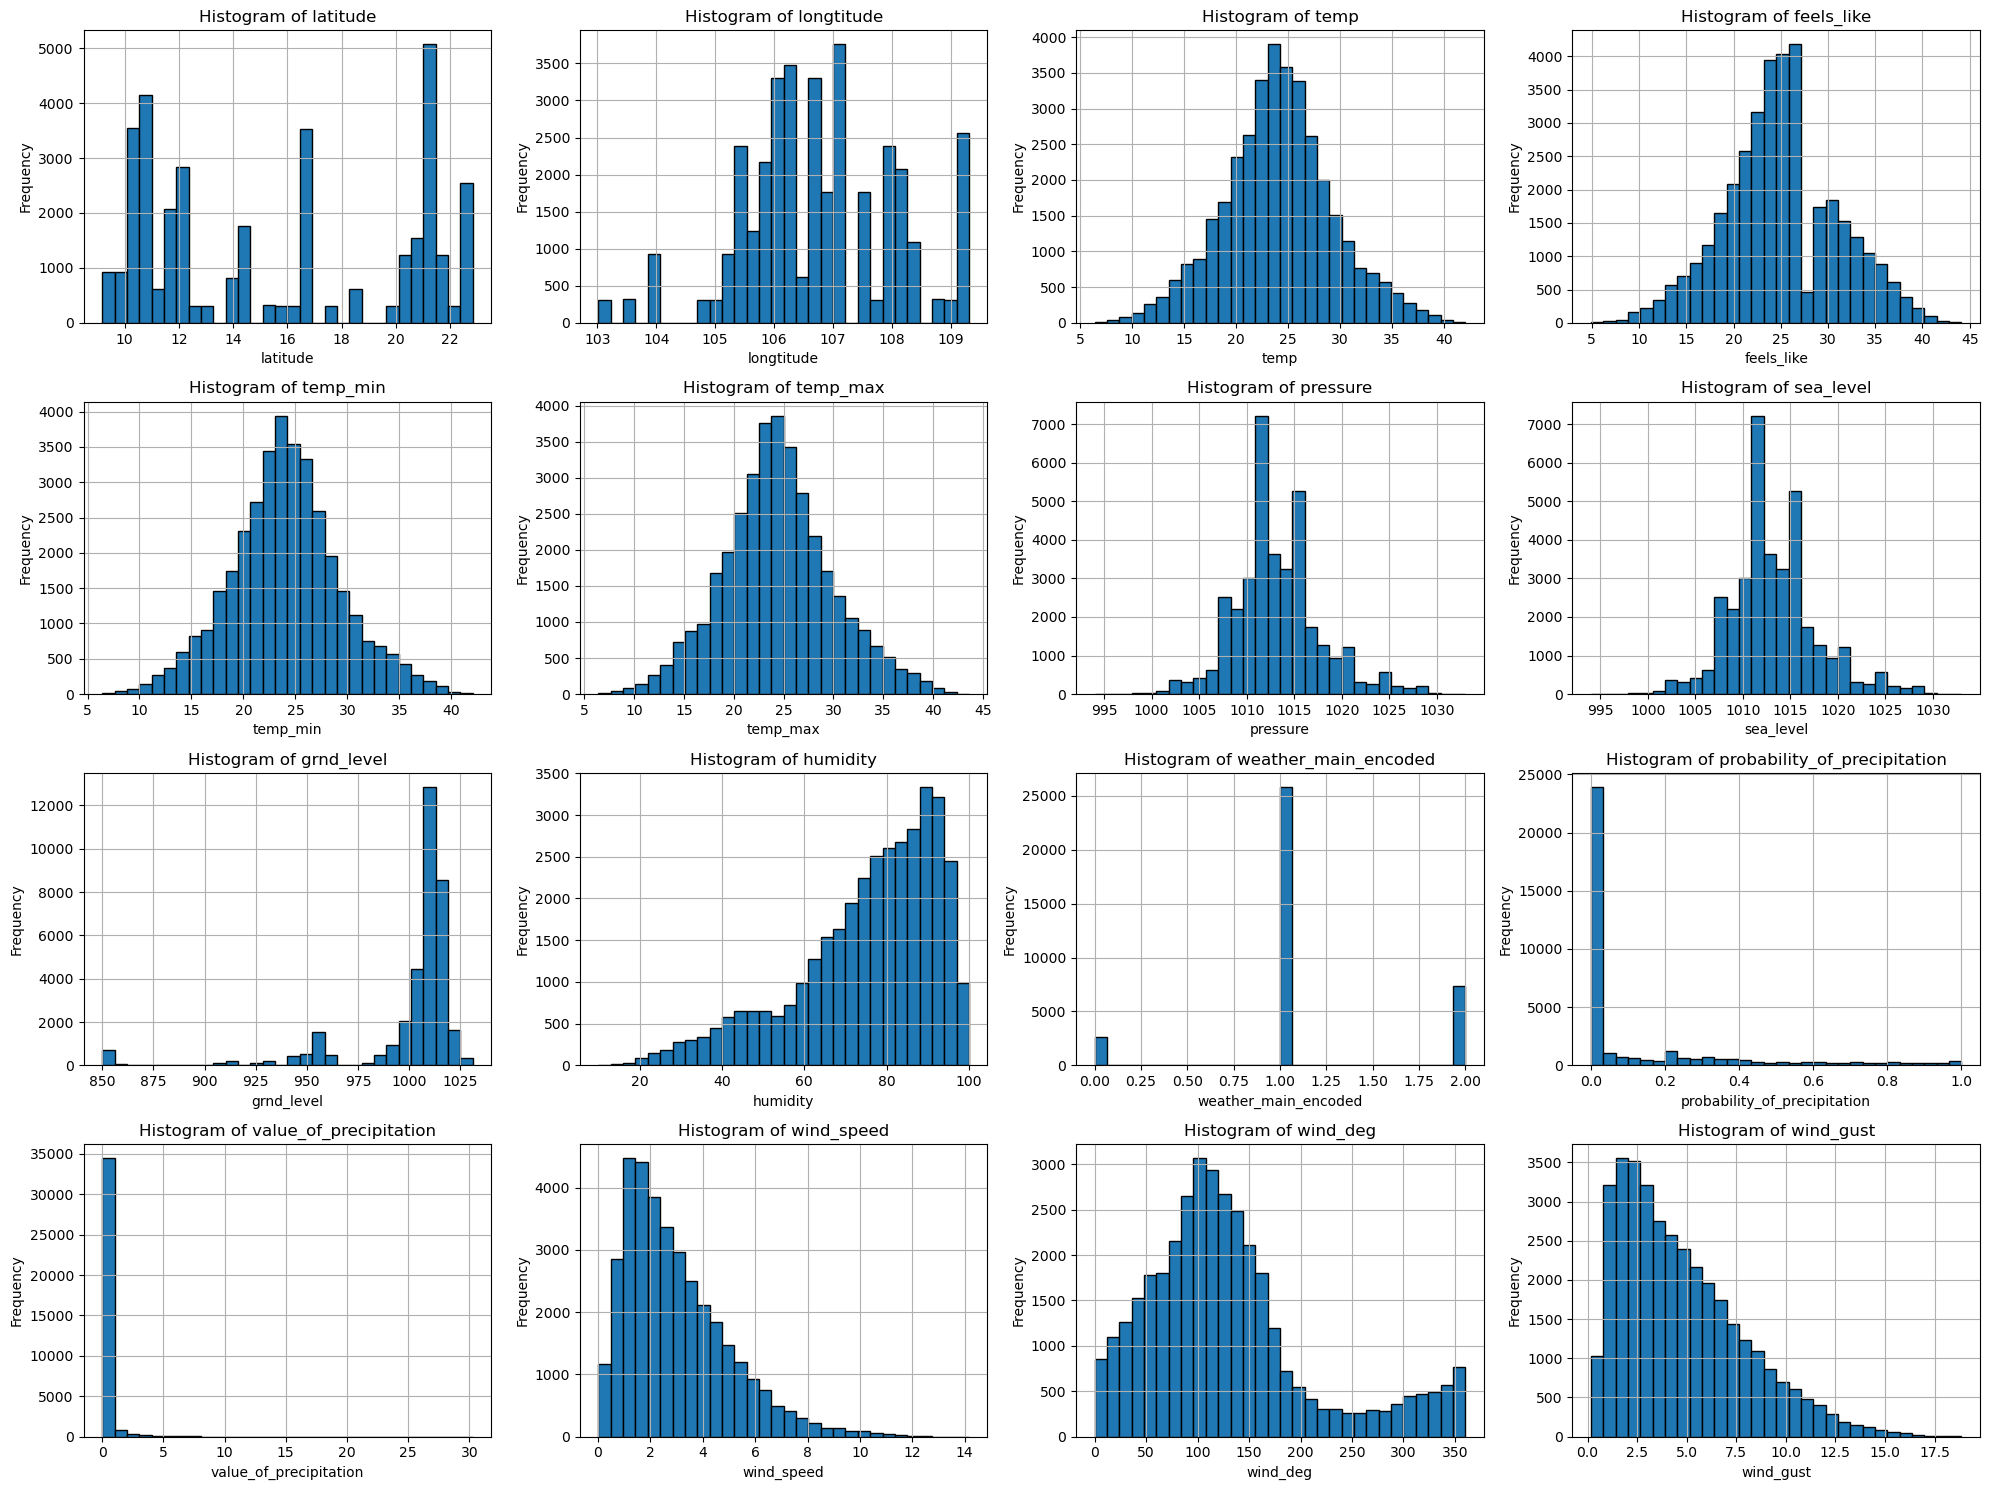

In [12]:
numerical_columns = ['latitude', 'longtitude', 'temp', 'feels_like', 'temp_min', 'temp_max', 
                     'pressure', 'sea_level', 'grnd_level', 'humidity', 'weather_main_encoded',
                     'probability_of_precipitation', 'value_of_precipitation', 
                     'wind_speed', 'wind_deg', 'wind_gust']

#Creating histograms
plt.figure(figsize=(20,15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    df[column].hist(bins = 30, edgecolor = 'black')
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Data relevance

### Observation time 

In [13]:
# Expected forecast times
expected_times = [
    '00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
    '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00',
    '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00',
    '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00',
    '20:00:00', '21:00:00', '22:00:00', '23:00:00'
]

# Convert expected times to datetime.time objects
expected_times = [pd.to_datetime(time).time() for time in expected_times]

# Create a DataFrame with expected times
expected_df = pd.DataFrame(expected_times, columns=['ftime'])

# Count the number of observations for each time
count_time = df['ftime'].value_counts().sort_index()

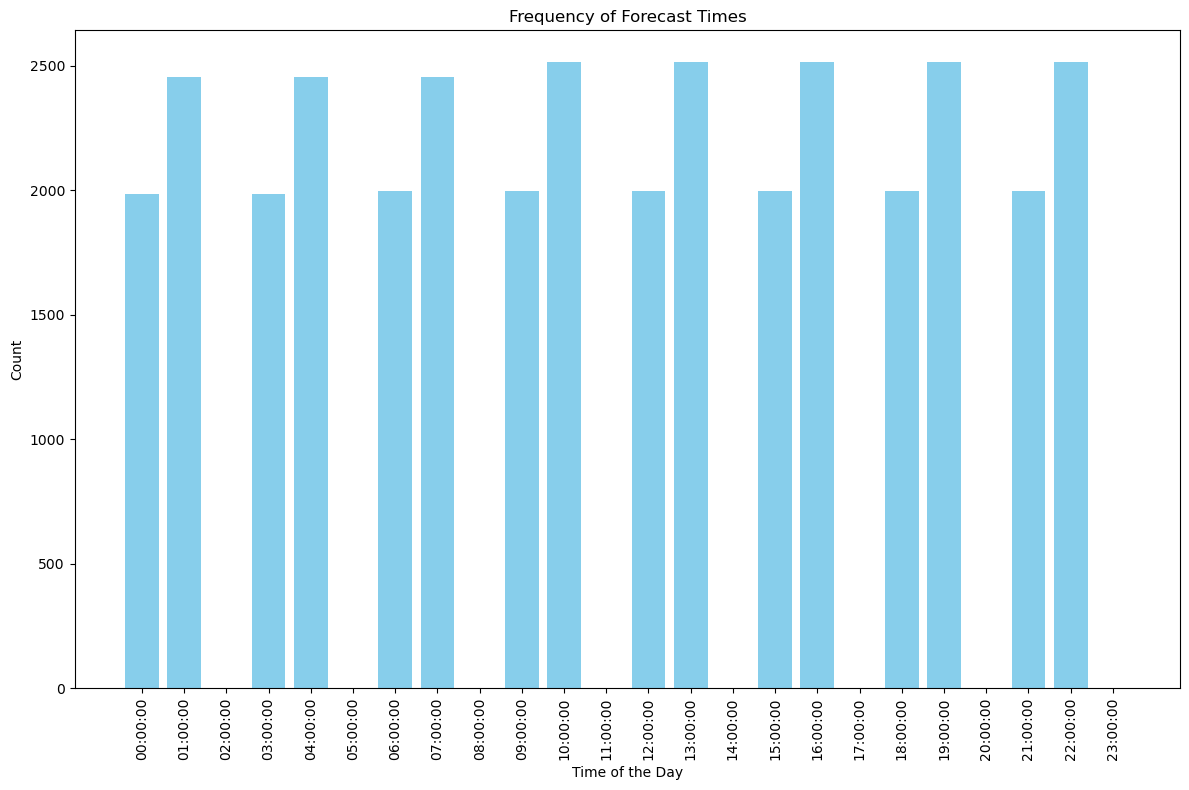

In [14]:
# Create a DataFrame for counts
count_df = pd.DataFrame(count_time).reset_index()
count_df.columns = ['time', 'count']

# Merge with expected times to include missing times
expected_df.columns = ["time"]
merged_df = expected_df.merge(count_df, on='time', how='left').fillna(0)

# Plot the frequency of each forecast time
plt.figure(figsize=(12, 8))
plt.bar(merged_df['time'].astype(str), merged_df['count'], color='skyblue')
plt.title('Frequency of Forecast Times')
plt.xlabel('Time of the Day')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The plot reveals that the dataset lacks observations in specific times, notably 2:00, 5:00, 8:00, 11:00, 14:00, 17:00, 20:00, 23:00. Which suggests the way data is colleted. However, looking into the number of observations in each time, we can see that the dataset has a good variation in every other time.

### Location observations

In [15]:
# Count the occurrences of each location
location_counts = df['city_name'].value_counts()

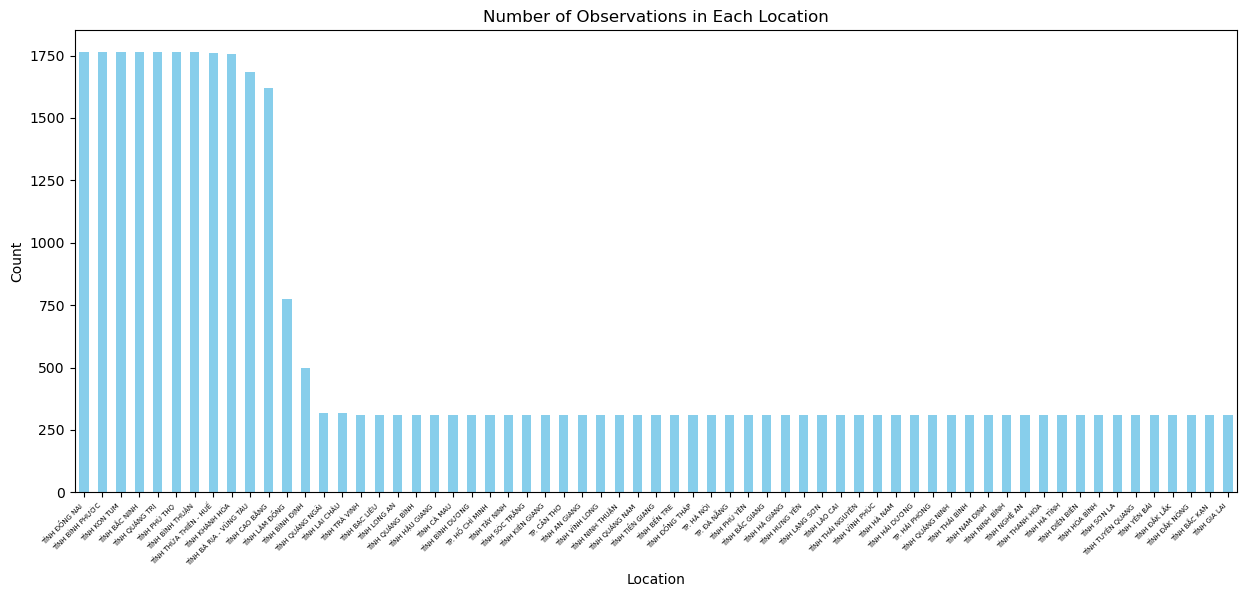

In [16]:
# Plot the number of observations in each location
plt.figure(figsize=(15, 6))
location_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Observations in Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', fontsize = 5 )
plt.show()

### Multiple features data relevances

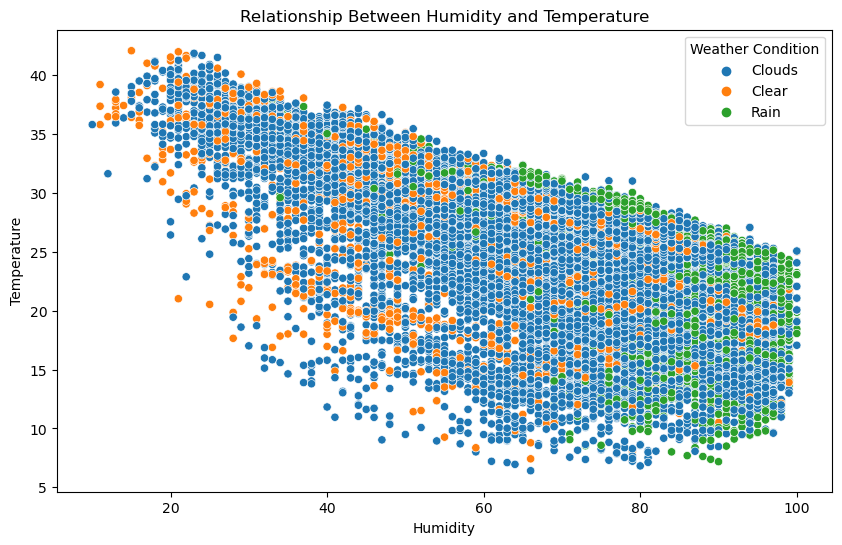

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='humidity', y='temp', hue='weather_main', data=df)
plt.title('Relationship Between Humidity and Temperature')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.legend(title='Weather Condition')
plt.show()


# III. Methods